In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import backend as K
from sklearn.preprocessing import OneHotEncoder
from glob import iglob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
from keras.losses import MeanSquaredError
from scipy.stats import pearsonr
from keras import backend as K
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data1_train = pd.read_csv("/content/drive/MyDrive/Data mưa/cv1_data_train_92022.csv")
data1_test = pd.read_csv("/content/drive/MyDrive/Data mưa/cv1_data_test_92022.csv")
data2_train = pd.read_csv("/content/drive/MyDrive/Data mưa/cv2_data_train_92022.csv")
data2_test = pd.read_csv('/content/drive/MyDrive/Data mưa/cv2_data_test_92022.csv')
data3_train = pd.read_csv('/content/drive/MyDrive/Data mưa/cv3_data_train_92022.csv')
data3_test = pd.read_csv('/content/drive/MyDrive/Data mưa/cv3_data_test_92022.csv')
data4_train = pd.read_csv('/content/drive/MyDrive/Data mưa/cv4_data_train_92022.csv')
data4_test = pd.read_csv('/content/drive/MyDrive/Data mưa/cv4_data_test_92022.csv')
data5_train = pd.read_csv('/content/drive/MyDrive/Data mưa/cv5_data_train_92022.csv')
data5_test = pd.read_csv('/content/drive/MyDrive/Data mưa/cv5_data_test_92022.csv')
data6_train = pd.read_csv('/content/drive/MyDrive/Data mưa/cv6_data_train_92022.csv')
data6_test = pd.read_csv('/content/drive/MyDrive/Data mưa/cv6_data_test_92022.csv')
data7_train = pd.read_csv('/content/drive/MyDrive/Data mưa/cv7_data_train_92022.csv')
data7_test = pd.read_csv('/content/drive/MyDrive/Data mưa/cv7_data_test_92022.csv')
data8_train = pd.read_csv('/content/drive/MyDrive/Data mưa/cv8_data_train_92022.csv')
data8_test = pd.read_csv('/content/drive/MyDrive/Data mưa/cv8_data_test_92022.csv')
data9_train = pd.read_csv('/content/drive/MyDrive/Data mưa/cv9_data_train_92022.csv')
data9_test = pd.read_csv('/content/drive/MyDrive/Data mưa/cv9_data_test_92022.csv')
data10_train = pd.read_csv('/content/drive/MyDrive/Data mưa/cv10_data_train_92022.csv')
data10_test = pd.read_csv('/content/drive/MyDrive/Data mưa/cv10_data_test_92022.csv')
data11_train = pd.read_csv('/content/drive/MyDrive/Data mưa/cv11_data_train_92022.csv')
data11_test = pd.read_csv('/content/drive/MyDrive/Data mưa/cv11_data_test_92022.csv')
data12_train = pd.read_csv('/content/drive/MyDrive/Data mưa/cv12_data_train_92022.csv')
data12_test = pd.read_csv('/content/drive/MyDrive/Data mưa/cv12_data_test_92022.csv')
data13_train = pd.read_csv('/content/drive/MyDrive/Data mưa/cv13_data_train_92022.csv')
data13_test = pd.read_csv('/content/drive/MyDrive/Data mưa/cv13_data_test_92022.csv')



In [ ]:
def r(y_true, y_pred):
	mean_true = K.mean(y_true)
	mean_pred = K.mean(y_pred)
	return (K.sum((y_true - mean_true) * (y_pred - mean_pred)))/(K.sum(K.sqrt(K.pow(y_true - mean_true, 2) * K.pow(y_pred - mean_pred, 2))) + K.epsilon())

In [ ]:
data_train = data12_train
data_test = data12_test

In [ ]:
# data_train = pd.concat([data1_train, data1_test, data3_train, data3_test, data4_train, data4_test, data5_train, data5_test,
#                        data6_train, data6_test, data7_train, data7_test, data8_train, data8_test, data9_train, data9_test,
#                        data10_train, data10_test, data11_train, data11_test, data12_train, data12_test, data13_train, data13_test])
# data_test = pd.concat([data2_train, data2_test])

In [ ]:
data_train = data_train[data_train['value'] != 0]
data_test = data_test[data_test['value'] != 0]


In [ ]:
data_train = data_train.drop(columns = ['x_id', 'y_id', 'DEM_value', 'cloud_value'])


In [ ]:

data_test = data_test.drop(columns = ['x_id', 'y_id', 'DEM_value', 'cloud_value'])


In [ ]:
data_train['utc_time'] = pd.to_datetime(data_train['utc_time'])
data_train['hour'] = data_train['utc_time'].apply(lambda x: x.hour)
import datetime

def function(x):
    x = x.timetuple()
    jdate = x.tm_yday
    return(jdate)
data_train['date'] = data_train['utc_time'].apply(lambda x: function(x))


In [ ]:
data_test['utc_time'] = pd.to_datetime(data_test['utc_time'])
data_test['hour'] = data_test['utc_time'].apply(lambda x: x.hour)
import datetime

def function(x):
    x = x.timetuple()
    jdate = x.tm_yday
    return(jdate)
data_test['date'] = data_test['utc_time'].apply(lambda x: function(x))

In [ ]:


data_train['day'] = data_train['utc_time'].apply(lambda x: x.day)
data_train['month'] = data_train['utc_time'].apply(lambda x: x.month)

In [ ]:
data_test['day'] = data_test['utc_time'].apply(lambda x: x.day)
data_test['month'] = data_test['utc_time'].apply(lambda x: x.month)

In [ ]:
def fill_columns(data_test):
  data_test['day_1'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 1 else 0)
  data_test['day_2'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 2 else 0)
  data_test['day_3'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 3 else 0)
  data_test['day_4'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 4 else 0)
  data_test['day_5'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 5 else 0)
  data_test['day_6'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 6 else 0)
  data_test['day_7'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 7 else 0)
  data_test['day_8'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 8 else 0)
  data_test['day_9'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 9 else 0)
  data_test['day_10'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 10 else 0)
  data_test['day_11'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 11 else 0)
  data_test['day_12'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 12 else 0)
  data_test['day_13'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 13 else 0)
  data_test['day_14'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 14 else 0)
  data_test['day_15'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 15 else 0)
  data_test['day_16'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 16 else 0)
  data_test['day_17'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 17 else 0)
  data_test['day_18'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 18 else 0)
  data_test['day_19'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 19 else 0)
  data_test['day_20'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 20 else 0)
  data_test['day_21'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 21 else 0)
  data_test['day_22'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 22 else 0)
  data_test['day_23'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 23 else 0)
  data_test['day_24'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 24 else 0)
  data_test['day_25'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 25 else 0)
  data_test['day_26'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 26 else 0)
  data_test['day_27'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 27 else 0)
  data_test['day_28'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 28 else 0)
  data_test['day_29'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 29 else 0)
  data_test['day_30'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 30 else 0)
  data_test['day_31'] = data_test['utc_time'].apply(lambda x: 1 if x.day == 31 else 0)
  data_test['month_8'] = data_test['utc_time'].apply(lambda x: 1 if x.month == 8 else 0)
  data_test['month_9'] = data_test['utc_time'].apply(lambda x: 1 if x.month == 9 else 0)
  data_test['month_10'] = data_test['utc_time'].apply(lambda x: 1 if x.month == 10 else 0)
  data_test['month_11'] = data_test['utc_time'].apply(lambda x: 1 if x.month == 11 else 0)


In [ ]:
fill_columns(data_test)
fill_columns(data_train)

In [ ]:
data_train = data_train.drop(columns = 'utc_time')

In [ ]:
data_test = data_test.drop(columns = 'utc_time')

In [ ]:
data_train 

,Name,id,lon,lat,value,irb_value,wvb_b09,b09_b10,b10_b16,b11_irb,...,day_26,day_27,day_28,day_29,day_30,day_31,month_8,month_9,month_10,month_11
2,226709,Bon Phặng,103.7740,21.388020,0.2,275.27075,-8.14667,-8.96960,-11.14472,-2.38075,...,0,0,0,0,0,0,0,0,1,0
3,355243,Dap-TDThacBa,105.0230,21.747030,1.2,226.62573,-3.65350,-1.18000,2.08033,1.15259,...,0,0,0,0,0,0,0,0,0,1
6,827707,Lùng Phình,104.3256,22.592780,0.2,240.63751,-5.89599,-2.80567,0.37415,-0.50897,...,0,0,0,0,0,0,0,0,1,0
7,134604,TanTru,106.5203,10.520560,0.2,249.41003,-7.57355,-4.96355,-0.35480,-0.22003,...,0,0,0,0,0,0,0,1,0,0
8,634150,Đinh Trang Thượng,107.9703,11.726110,1.8,287.28284,-10.59155,-9.52618,-13.02918,-1.99878,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455125,9053,EaSin,108.1370,13.069390,2.4,256.57202,-9.00946,-5.48767,-2.88971,-0.99200,...,0,0,0,0,0,0,1,0,0,0
455127,169811,NT.DongHai,105.6942,9.191111,0.8,276.25464,-9.72003,-7.40374,-10.08624,-2.86614,...,0,0,0,0,0,0,0,1,0,0
455131,ARG026 ...,NGOC LAC,105.4000,20.033330,2.6,272.78003,-12.23797,-7.90425,-4.77000,-1.42003,...,0,0,0,0,0,0,0,0,1,0
455134,201575,NuiSap,105.2706,10.267190,5.8,273.78003,-9.17822,-7.35956,-8.52698,-2.42003,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data_train = data_train.sort_values(by = ['id', 'date', 'hour'])


In [ ]:
data_test = data_test.sort_values(by = ['id', 'date', 'hour'])

In [ ]:
data_train

,Name,id,lon,lat,value,irb_value,wvb_b09,b09_b10,b10_b16,b11_irb,...,day_26,day_27,day_28,day_29,day_30,day_31,month_8,month_9,month_10,month_11
195634,356642,A Bung,107.0261,16.36830,1.0,265.90723,-7.87616,-8.39807,-7.45459,-1.06446,...,0,0,0,0,0,0,0,0,0,0
244305,356642,A Bung,107.0261,16.36830,15.6,225.62500,-2.35748,0.47748,-0.45429,-0.29102,...,0,0,0,0,0,0,0,0,0,0
345595,356642,A Bung,107.0261,16.36830,1.0,260.20996,-9.43219,-5.39379,-2.23621,-2.01392,...,0,0,0,0,0,0,1,0,0,0
148202,356642,A Bung,107.0261,16.36830,0.2,259.61365,-8.69440,-4.58129,-2.42072,-2.06165,...,0,0,0,0,0,0,1,0,0,0
270064,356642,A Bung,107.0261,16.36830,0.6,264.24000,-8.93762,-5.24445,-3.90924,-2.31996,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384482,299387,Đức Vân - Bắc Kạn,106.0331,22.44722,0.2,291.11400,-8.43219,-8.75628,-16.15290,-3.34800,...,0,0,0,0,0,0,0,1,0,0
62037,299387,Đức Vân - Bắc Kạn,106.0331,22.44722,0.2,259.61365,-5.37335,-3.78521,-5.07142,-1.41761,...,0,0,0,0,0,0,0,1,0,0
295513,299387,Đức Vân - Bắc Kạn,106.0331,22.44722,0.2,252.74902,-6.38220,-3.31433,-0.24457,-1.34900,...,0,0,0,0,0,0,0,1,0,0
299573,299387,Đức Vân - Bắc Kạn,106.0331,22.44722,0.2,254.68500,-6.28107,-2.16149,-1.33851,-2.56500,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data_test

,Name,id,lon,lat,value,irb_value,wvb_b09,b09_b10,b10_b16,b11_irb,...,day_26,day_27,day_28,day_29,day_30,day_31,month_8,month_9,month_10,month_11
42104,356642,A Bung,107.0261,16.36830,21.2,265.90723,-5.59662,-3.90429,-5.34974,-2.21363,...,0,0,1,0,0,0,0,0,1,0
6659,356642,A Bung,107.0261,16.36830,23.8,254.68500,-4.92994,-0.33715,-1.17176,-2.56500,...,0,0,1,0,0,0,0,0,1,0
56566,356642,A Bung,107.0261,16.36830,20.0,259.61365,-4.92994,-1.26434,-2.88971,-2.06165,...,0,0,1,0,0,0,0,0,1,0
52297,356642,A Bung,107.0261,16.36830,19.8,282.84497,-6.53210,-6.61286,-12.09729,-2.35071,...,0,0,1,0,0,0,0,0,1,0
54297,356642,A Bung,107.0261,16.36830,30.0,282.84497,-6.88428,-6.80194,-13.40741,-2.35071,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53624,630250,Đức Thông,106.2797,22.47917,0.2,274.28003,-12.06714,-8.81288,-4.77000,-1.90003,...,0,0,0,1,0,0,0,0,1,0
49130,630250,Đức Thông,106.2797,22.47917,0.2,260.79540,-8.93762,-4.43945,-1.60822,-1.33140,...,0,0,0,0,1,0,0,0,1,0
31377,630250,Đức Thông,106.2797,22.47917,0.2,260.20996,-9.16999,-5.58129,-1.79273,-0.74596,...,0,0,0,0,1,0,0,0,1,0
21958,630250,Đức Thông,106.2797,22.47917,0.2,260.79540,-9.43219,-5.39379,-1.60822,-1.33140,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
data_train = data_train.drop(index=data_train.loc[data_train['value'] < 1.8].index).reset_index(drop=True)

In [ ]:
data_test = data_test.drop(index=data_test.loc[data_test['value'] < 1.8].index).reset_index(drop=True)

In [ ]:
data_train = data_train.reset_index(drop = True)

In [ ]:
data_test = data_test.reset_index(drop = True)

In [ ]:

input_train = []
output_train = []
no_of_sample = len(data_train)
WINDOW_SIZE = 3 # 3 gio
for i in range(no_of_sample - WINDOW_SIZE + 1):
  next_idx = i + WINDOW_SIZE - 1
  if(data_train['hour'][next_idx] == (data_train['hour'][i] + WINDOW_SIZE - 1) % 24 and data_train['hour'][next_idx - 1] == (data_train['hour'][i] + WINDOW_SIZE - 2) and data_train['lat'][next_idx] == data_train['lat'][i] ):
    X = data_train.loc[i:i + WINDOW_SIZE - 1]
    X = X.drop(columns = ['hour', 'lat','lon', 'date', 'Name', 'id','value'])
    X.to_numpy()
    input_train.append(X)
    output_train.append(data_train['value'][i+WINDOW_SIZE - 1])



In [ ]:
input_test = []
output_test = []
no_of_sample = len(data_test) 
WINDOW_SIZE = 3 # 3 gio
for i in range(no_of_sample - WINDOW_SIZE + 1):
  next_idx = i + WINDOW_SIZE - 1
  if(data_test['hour'][next_idx] == (data_test['hour'][i] + WINDOW_SIZE - 1) % 24 and data_test['hour'][next_idx - 1] == (data_test['hour'][i] + WINDOW_SIZE - 2) and data_test['lat'][next_idx] == data_test['lat'][i] ):
    X = data_test.loc[i:i + WINDOW_SIZE - 1]
    X = X.drop(columns = ['hour', 'lat','lon', 'date', 'Name', 'id', 'value'])
    X.to_numpy()
    input_test.append(X)
    output_test.append(data_test['value'][i+WINDOW_SIZE - 1])

In [ ]:
X_train = np.array(input_train)

In [ ]:
y_train = np.array(output_train)

In [ ]:
X_test = np.array(input_test)

In [ ]:
y_test = np.array(output_test)

In [ ]:
X_train.shape

(18015, 3, 43)

In [ ]:
X_test.shape

(4521, 3, 43)

In [ ]:
#model
regressor = Sequential()
regressor.add(LSTM(units = 50, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dense(units = 1, activation = 'relu'))
regressor.compile(optimizer='adam', loss=MeanSquaredLogarithmicError(), metrics=[r])

In [ ]:
history = regressor.fit(X_train, 
					y_train, 
					epochs=128, 
					batch_size=256, 
					validation_split=0.1)

Epoch 1/128
64/64 [==============================] - 2s 11ms/step - loss: 1.6126 - r: 0.0487 - val_loss: 0.8792 - val_r: -0.0161
Epoch 2/128
64/64 [==============================] - 0s 5ms/step - loss: 0.7495 - r: 0.0066 - val_loss: 0.6325 - val_r: -0.0343
Epoch 3/128
64/64 [==============================] - 0s 5ms/step - loss: 0.5742 - r: -0.0484 - val_loss: 0.5275 - val_r: -0.1213
Epoch 4/128
64/64 [==============================] - 0s 5ms/step - loss: 0.5153 - r: -0.0472 - val_loss: 0.4979 - val_r: -0.1106
Epoch 5/128
64/64 [==============================] - 0s 5ms/step - loss: 0.5015 - r: -0.0711 - val_loss: 0.4896 - val_r: -0.0603
Epoch 6/128
64/64 [==============================] - 0s 5ms/step - loss: 0.4971 - r: -0.0352 - val_loss: 0.4874 - val_r: -0.0305
Epoch 7/128
64/64 [==============================] - 0s 5ms/step - loss: 0.4964 - r: 0.0991 - val_loss: 0.4869 - val_r: -0.0180
Epoch 8/128
64/64 [==============================] - 0s 5ms/step - loss: 0.4963 - r: 0.0381 - val_l

In [ ]:
y_predict = regressor.predict(X_test).flatten()

In [ ]:
y_predict.shape

(4521,)

In [ ]:
y_predict[0:5]

array([6.8763394, 6.8444   , 6.690666 , 5.704148 , 6.0475016],
      dtype=float32)

In [ ]:
y_train_predict = regressor.predict(X_train).flatten()

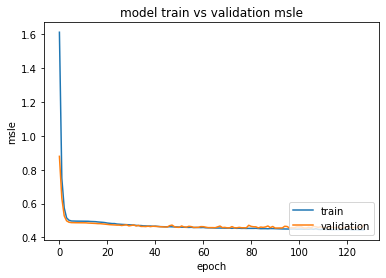

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation msle')
plt.ylabel('msle')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

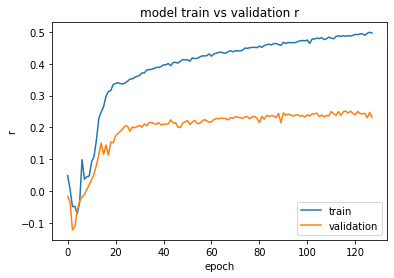

In [ ]:
plt.plot(history.history['r'])
plt.plot(history.history['val_r'])
plt.title('model train vs validation r')
plt.ylabel('r')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [ ]:
print('TRAINING model')
# print(y_train, y_train_pred)
print('Pearson r:', pearsonr(y_train, y_train_predict)[0])
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_predict)))
print('MAE:', mean_absolute_error(y_train, y_train_predict))

print('TESTING model')

print('Pearson r:', pearsonr(y_test, y_predict)[0])
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predict)))
print('MAE:', mean_absolute_error(y_test, y_predict))


TRAINING model
Pearson r: 0.2736476632974528
RMSE: 9.675495746310318
MAE: 5.256849013982069
TESTING model
Pearson r: 0.0678257743817211
RMSE: 11.68668756963437
MAE: 5.728366123504065
